# ML Clusterização e Regressão - Credit Card

https://www.kaggle.com/arjunbhasin2013/ccdata

Laura Alves de Paiva Machado

## Preparação do ambiente

### Instalando as bibliotecas

In [112]:
# !pip install --user -r requirements.txt

### Importando os pacotes

In [137]:
import pandas as pd
import sweetviz as sv
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, train

## Funções

In [114]:
resultf1 = {}

def ScoreF1 (tipoDeModelo, ytest, y_pred):
    resultf1[tipoDeModelo]={
                            "F1 Score":f1_score(y_test, y_pred)*100
    }

In [115]:
def EliminarOutliers (coluna):
    limitesuperior = coluna.mean() + 3*coluna.std()
    limiteinferior = coluna.mean() - 3*coluna.std()
    return coluna.apply(lambda x: limitesuperior if x>= limitesuperior else limiteinferior if x<= limiteinferior else x)

## Lendo os dados originais

In [116]:
dados = pd.read_csv('CC_ GENERAL.csv')

In [117]:
dados

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

INFORMAÇÕES DO DATASET:
- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user
- Link: https://www.kaggle.com/arjunbhasin2013/ccdata

## Explorando os dados

In [118]:
# Identificando os tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [119]:
# Entendo a distribuição dos dados
dados.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



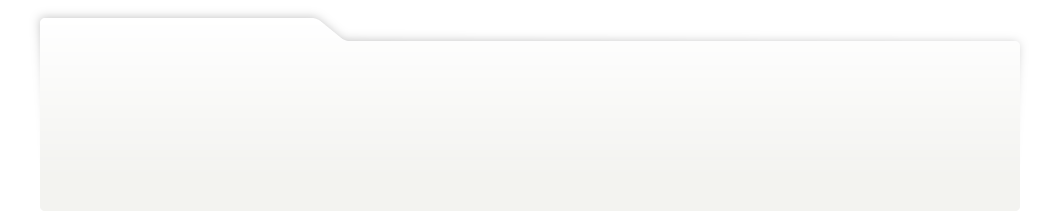
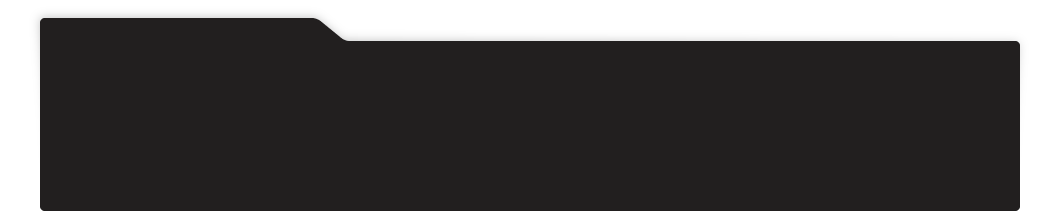
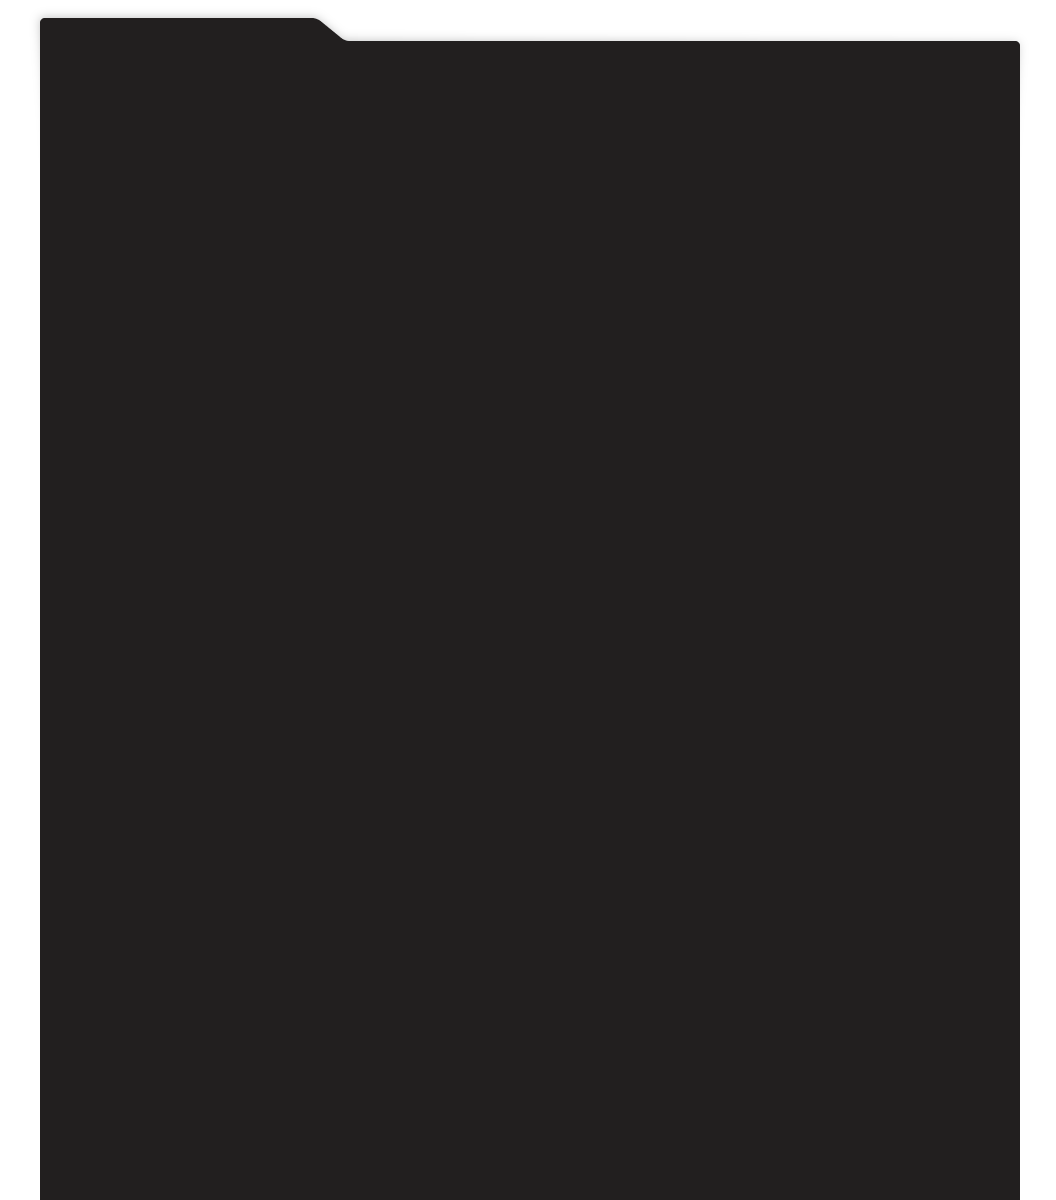
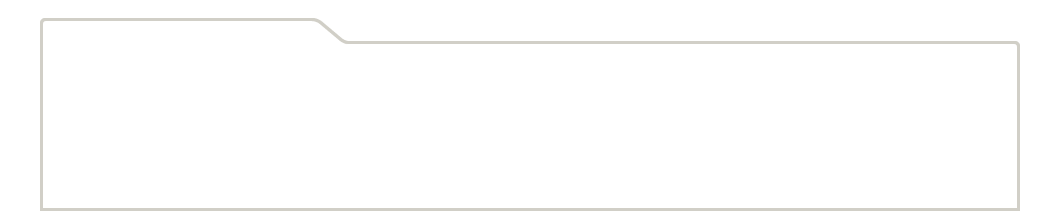
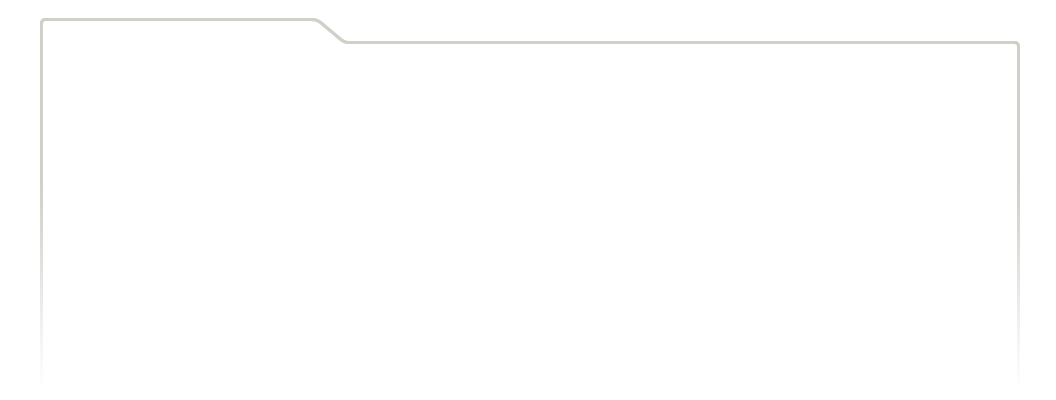
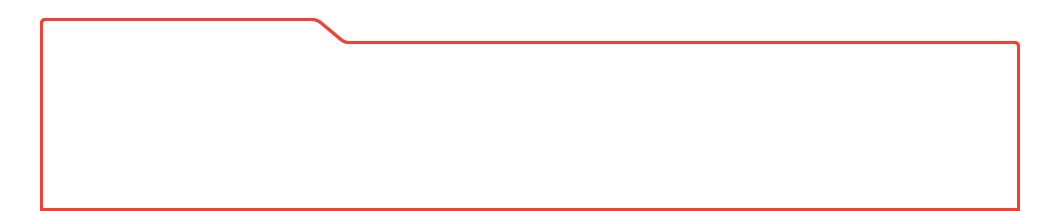
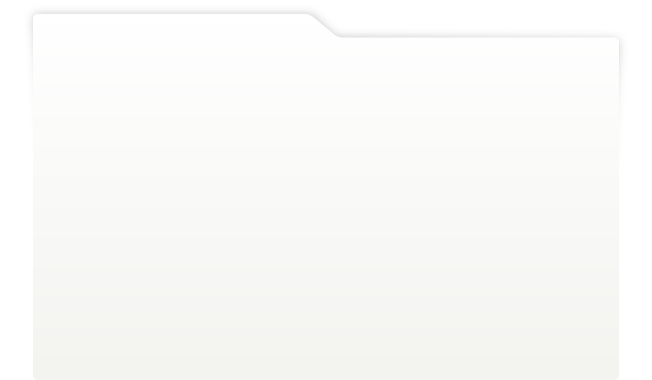
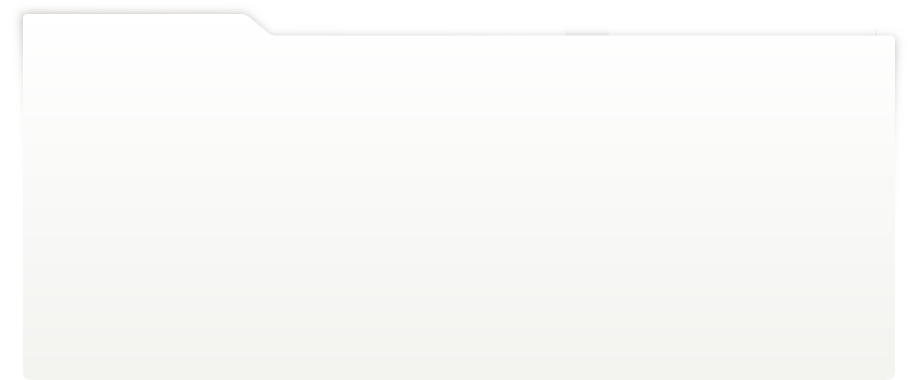
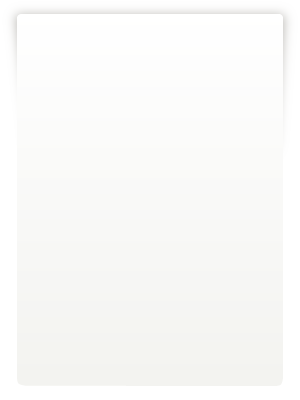
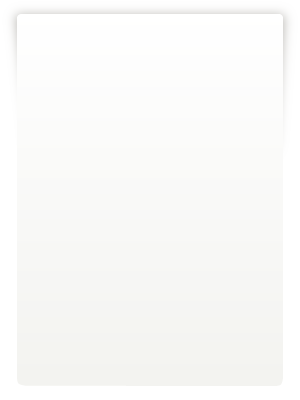
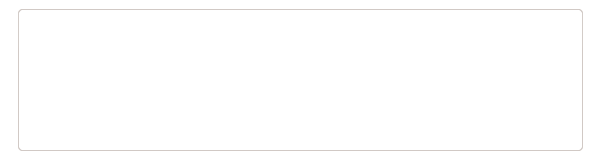
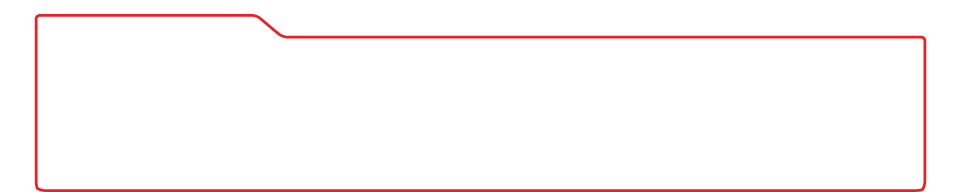
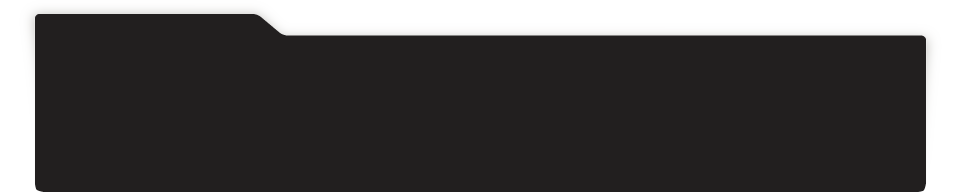
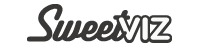
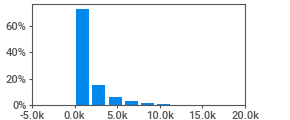
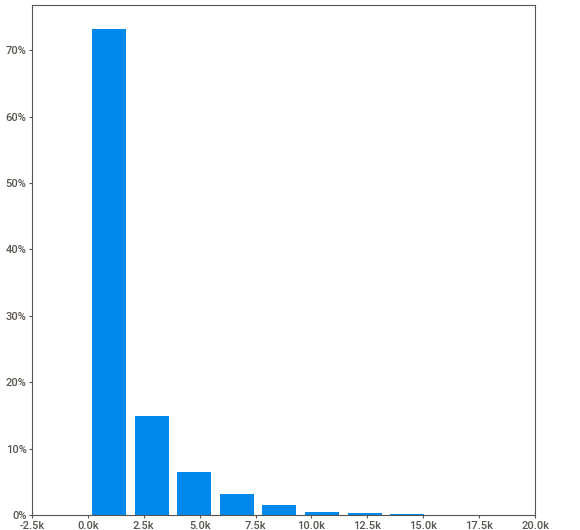
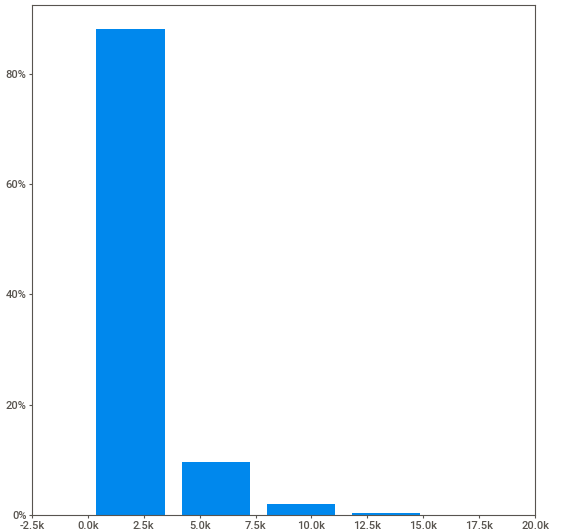
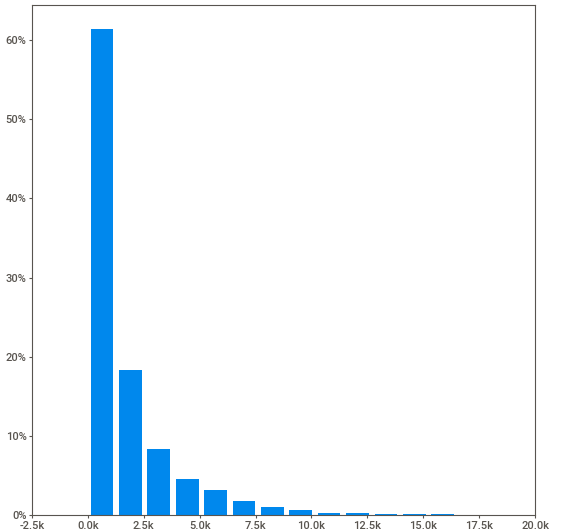
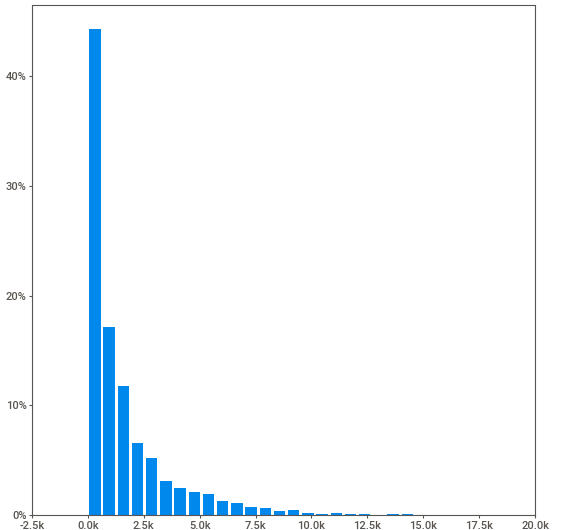
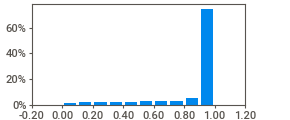
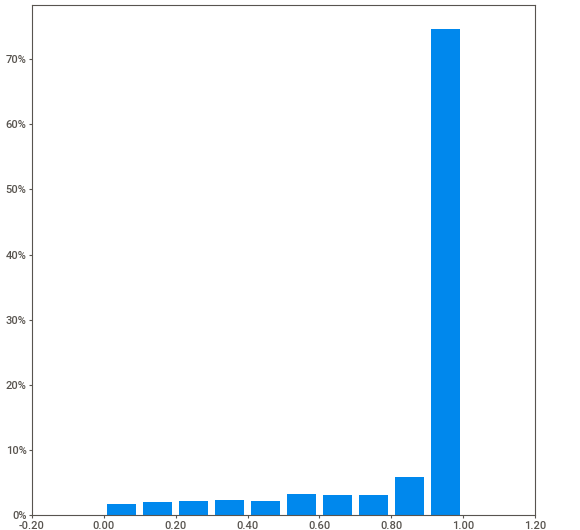
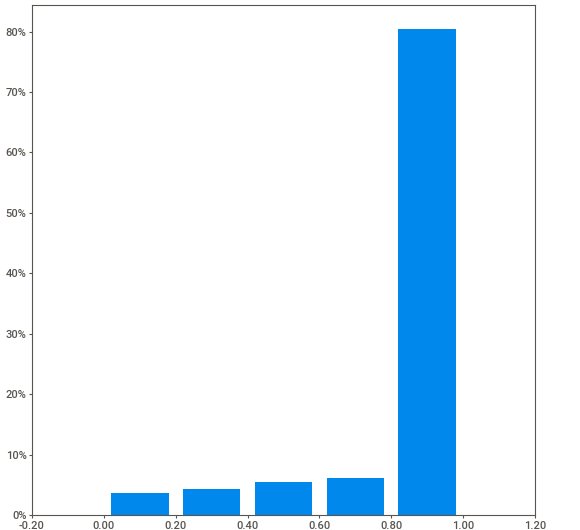
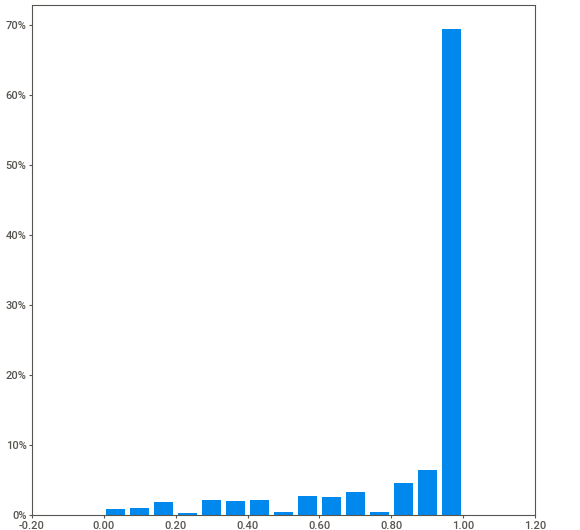
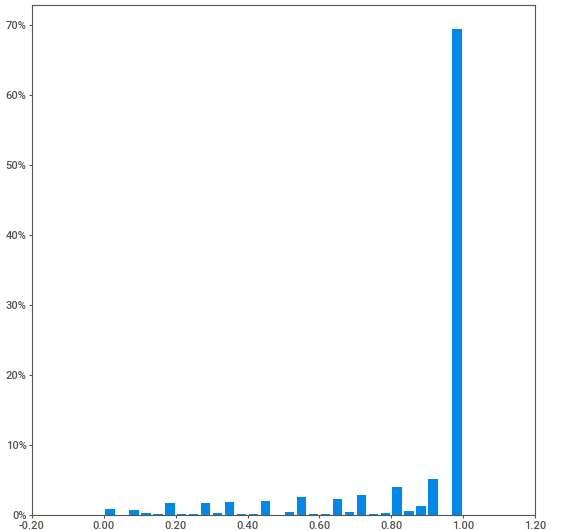
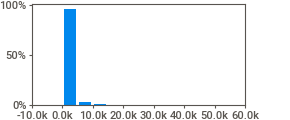
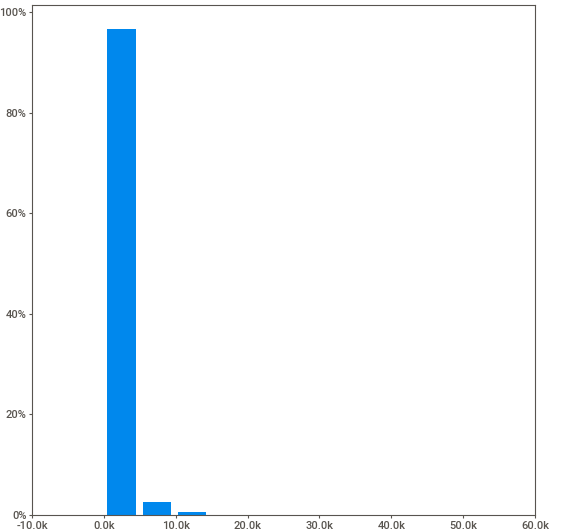
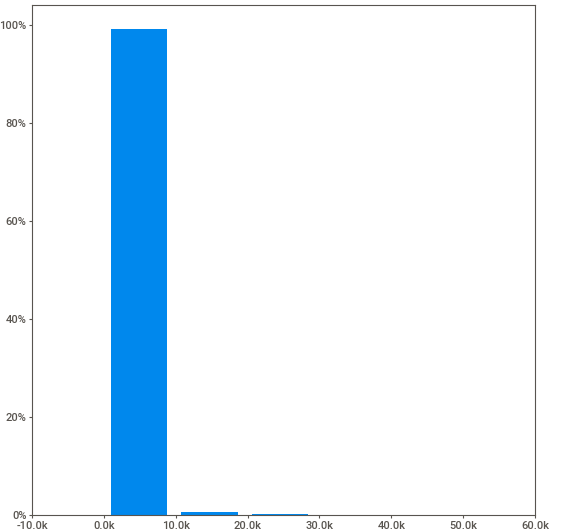
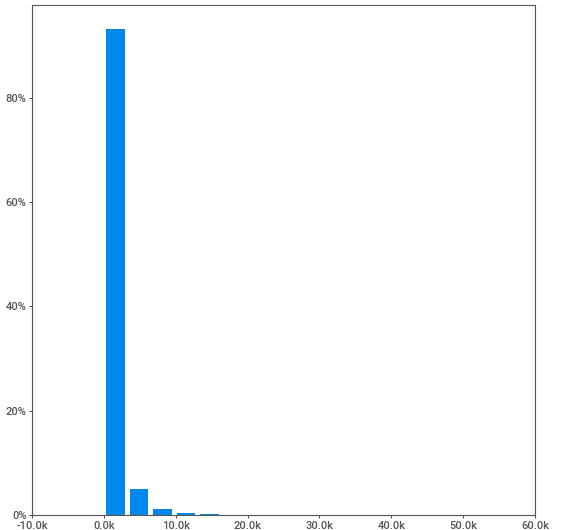
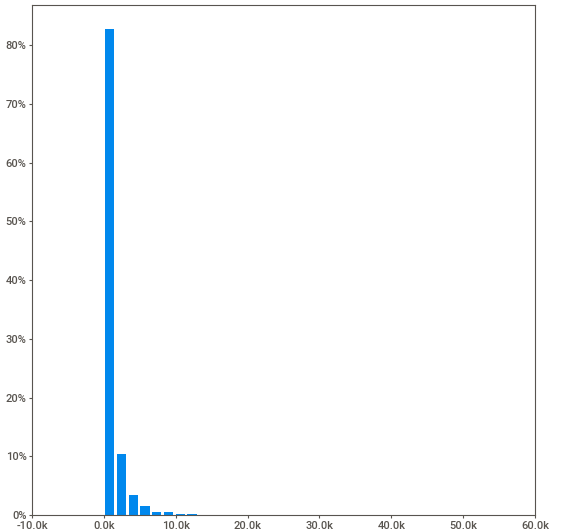
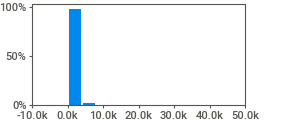
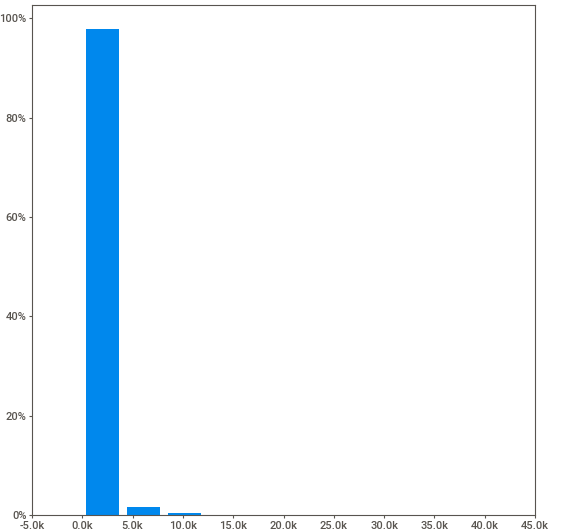
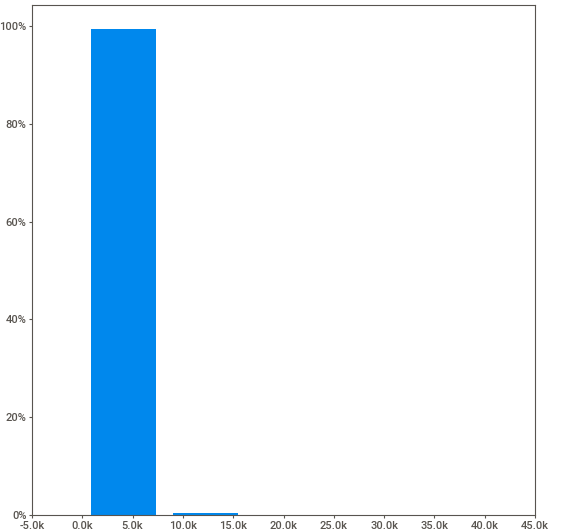
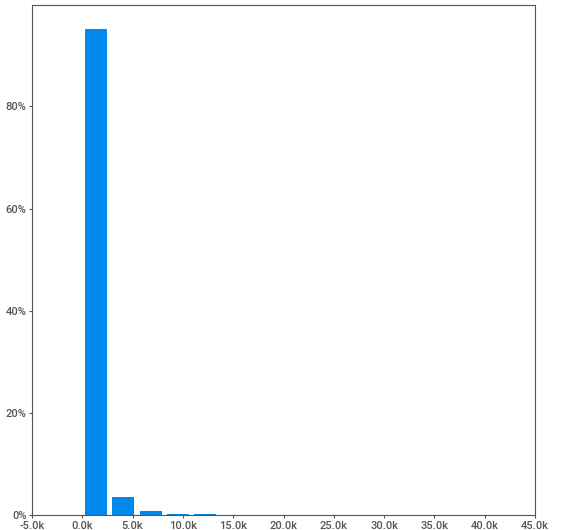
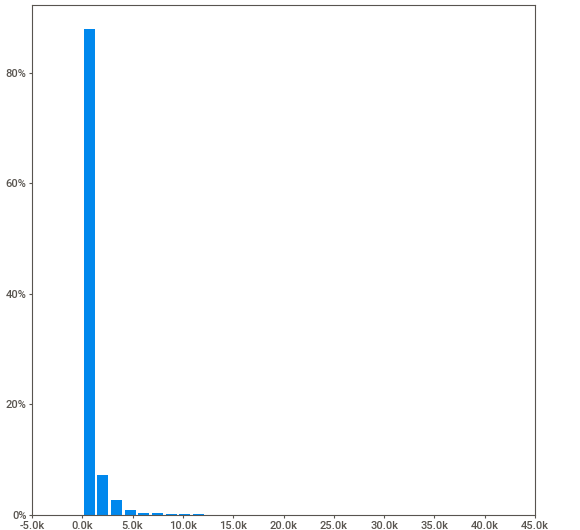
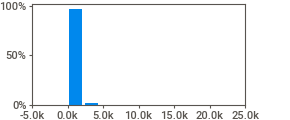
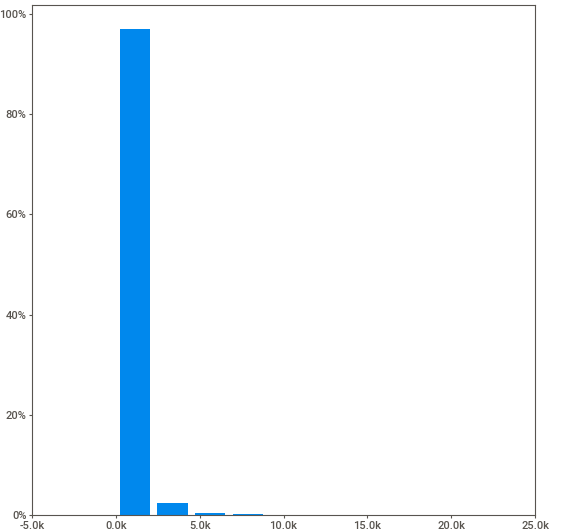
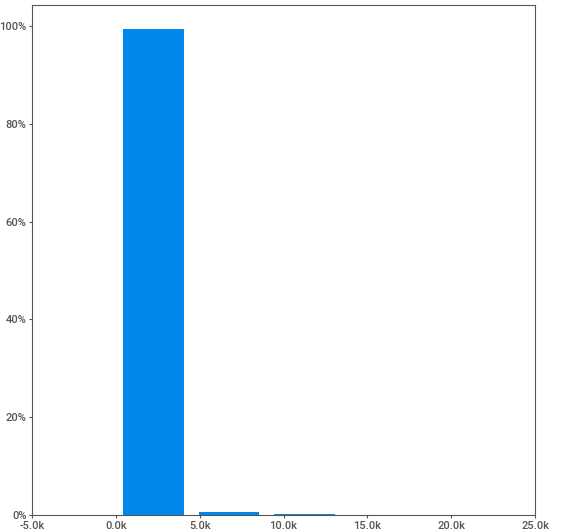
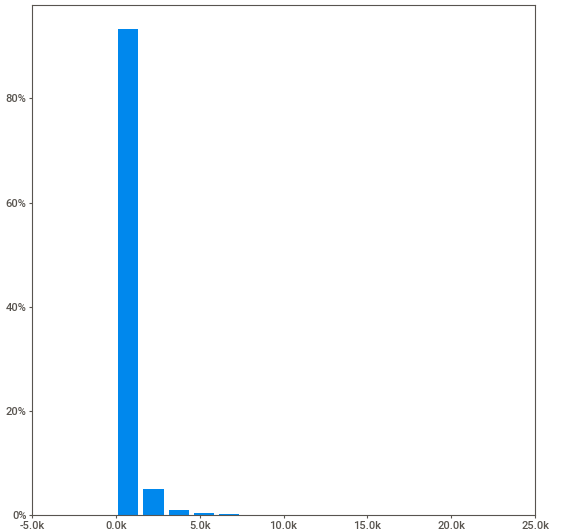
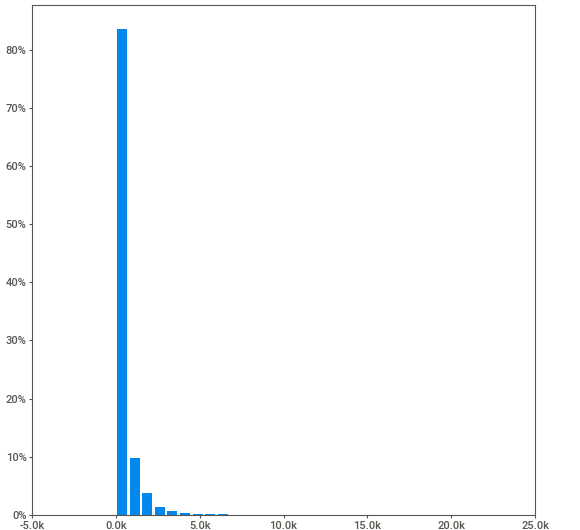
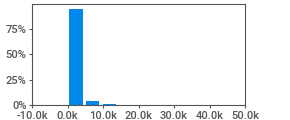
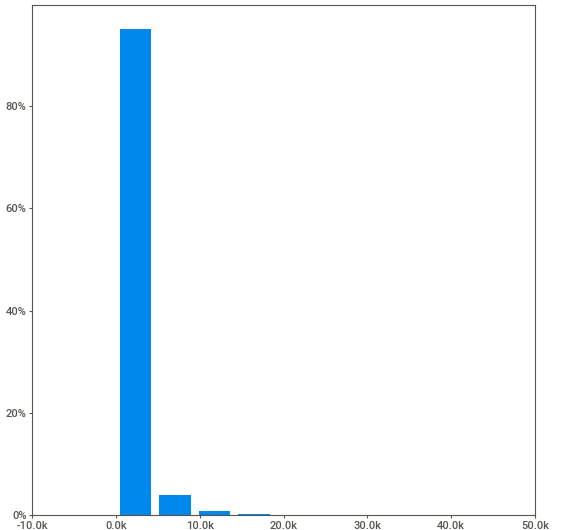
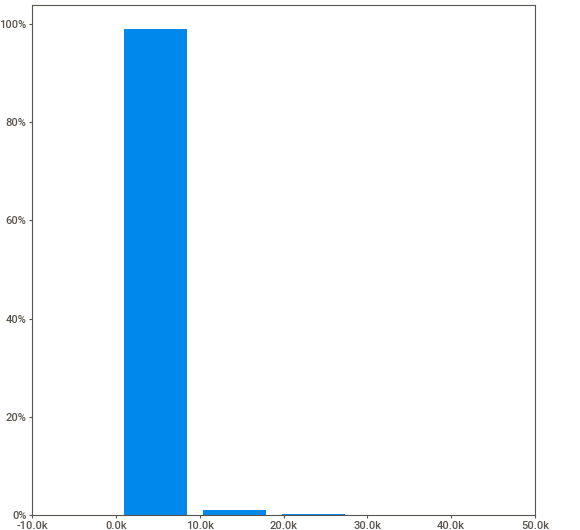
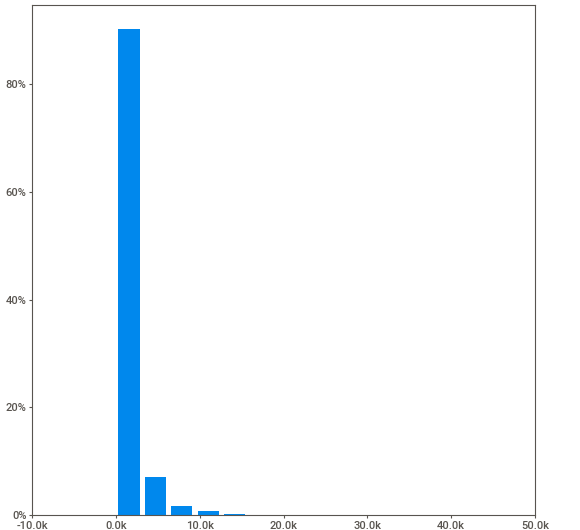
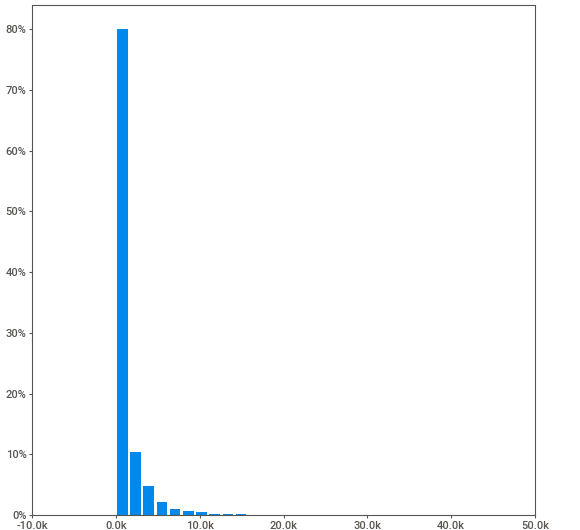
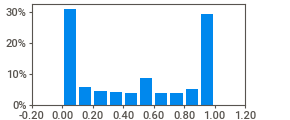
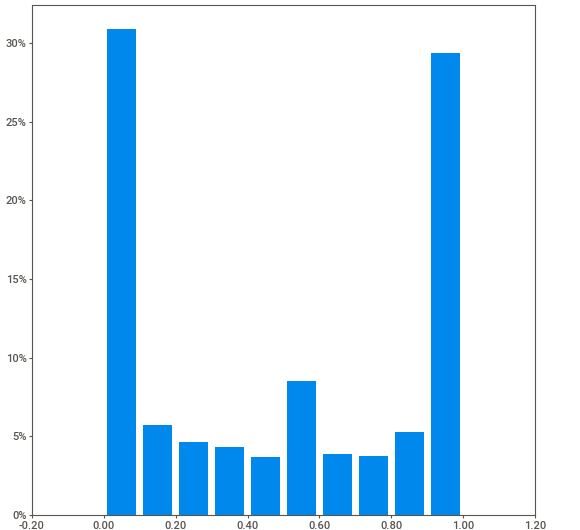
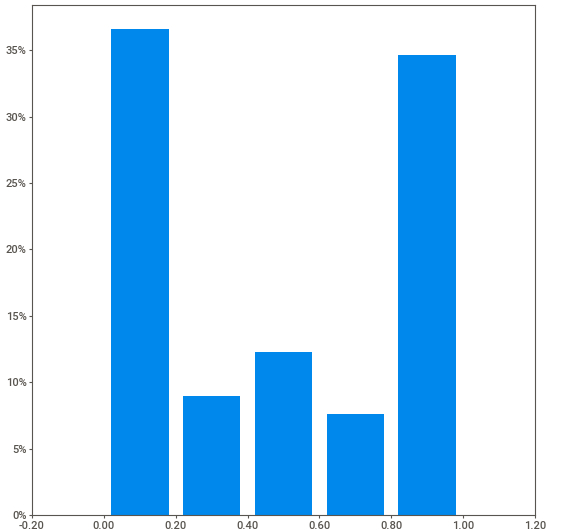
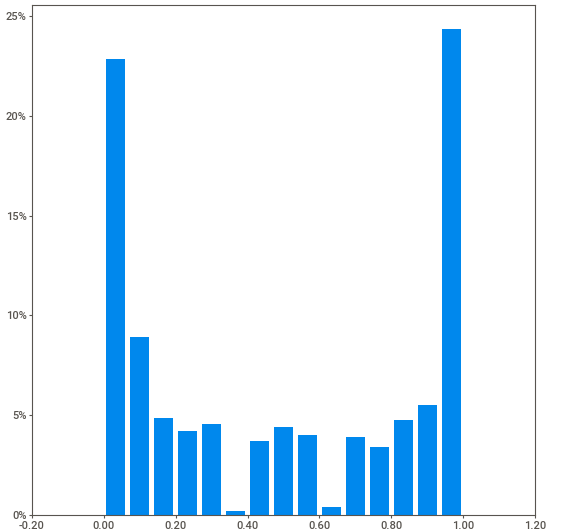
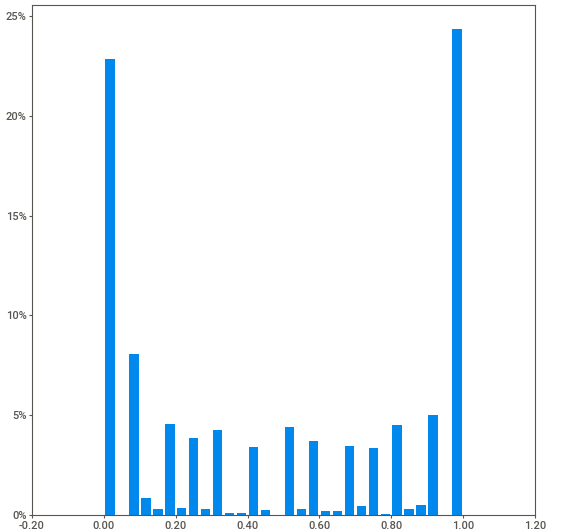
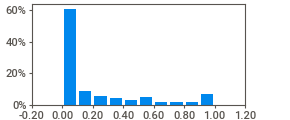
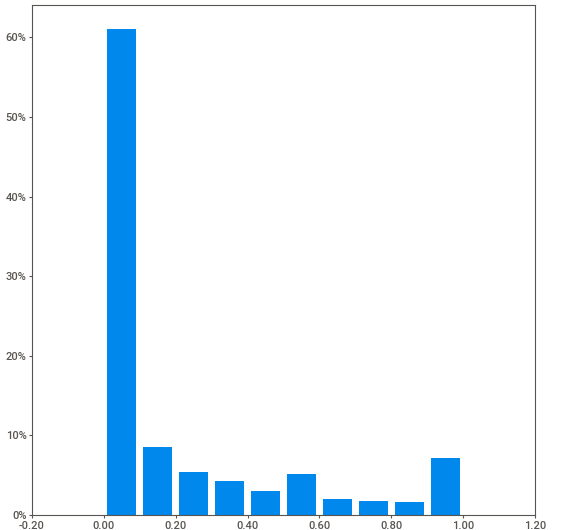
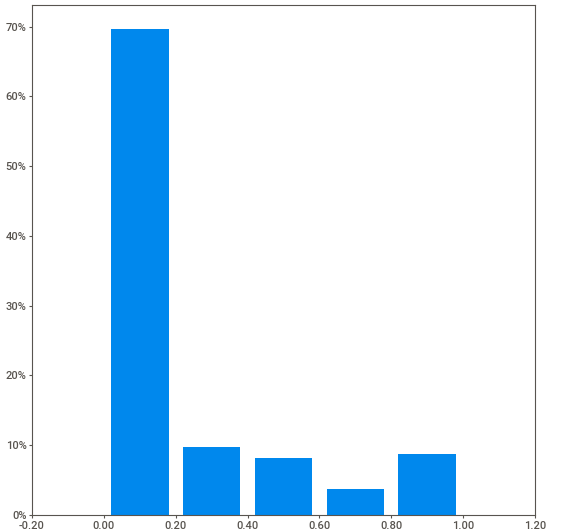
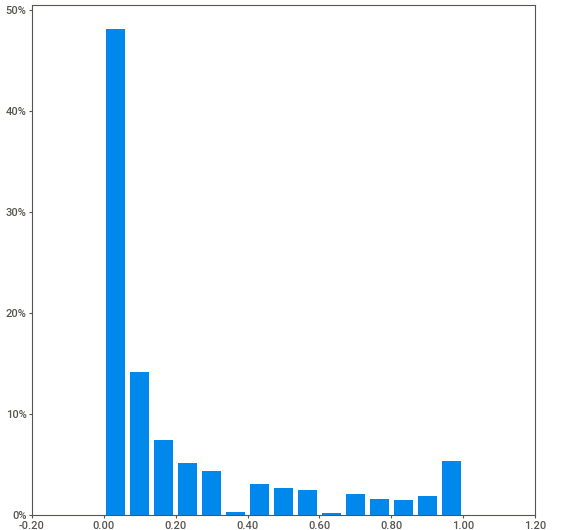
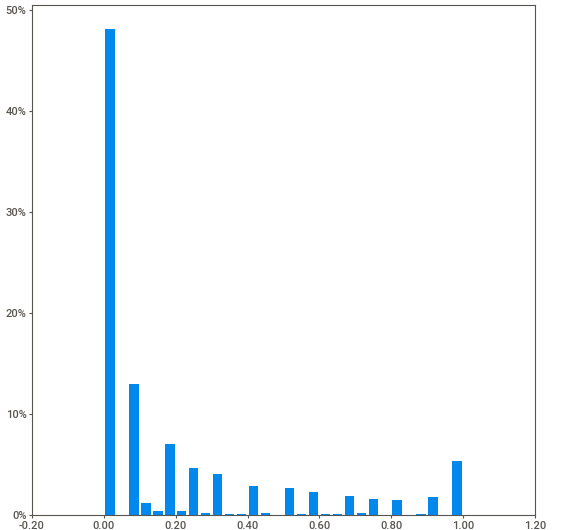
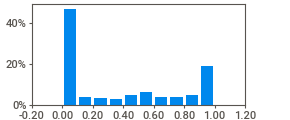
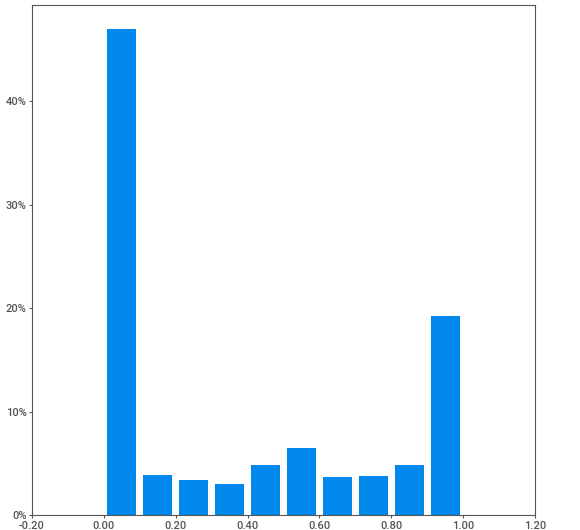
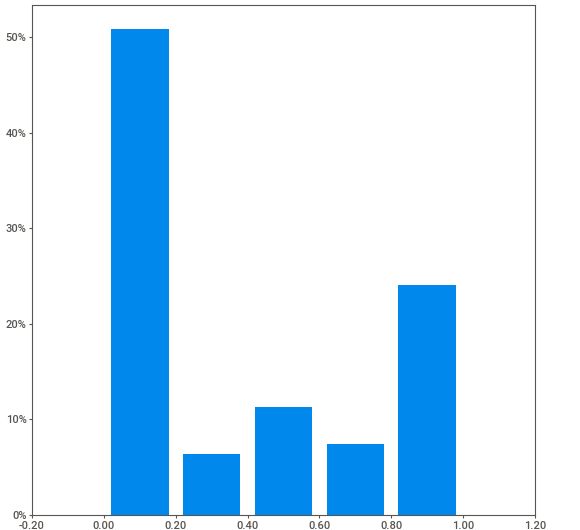
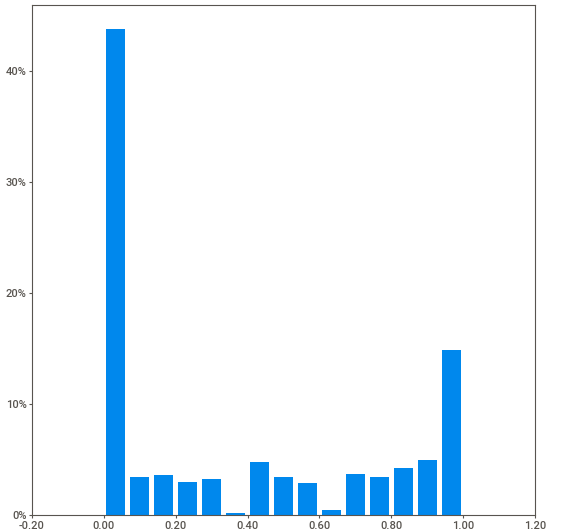
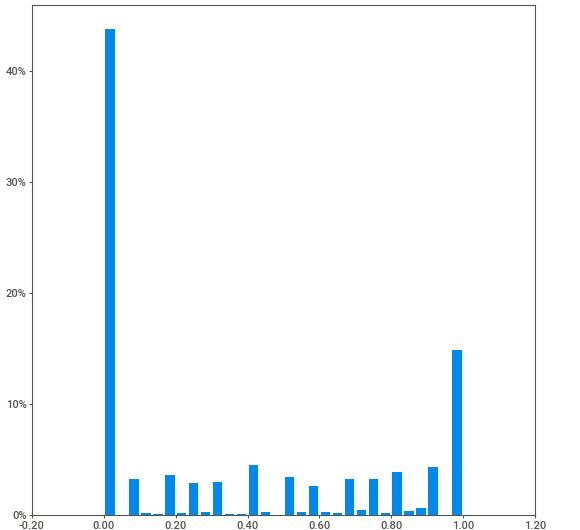
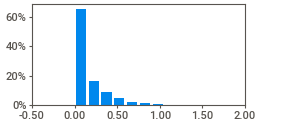
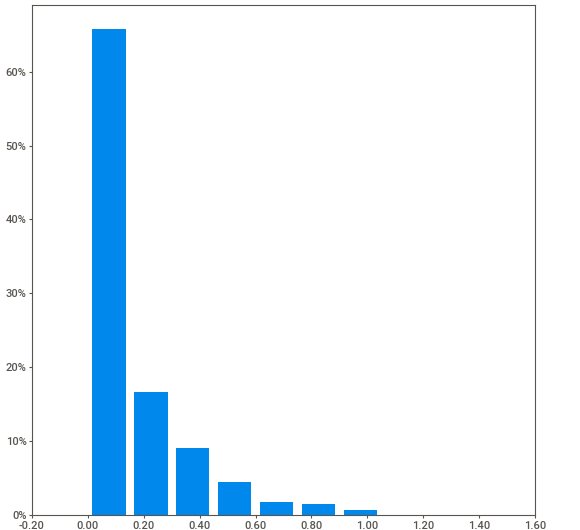
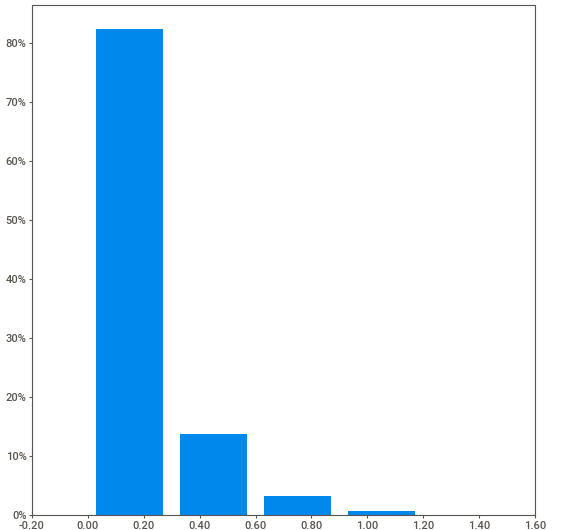
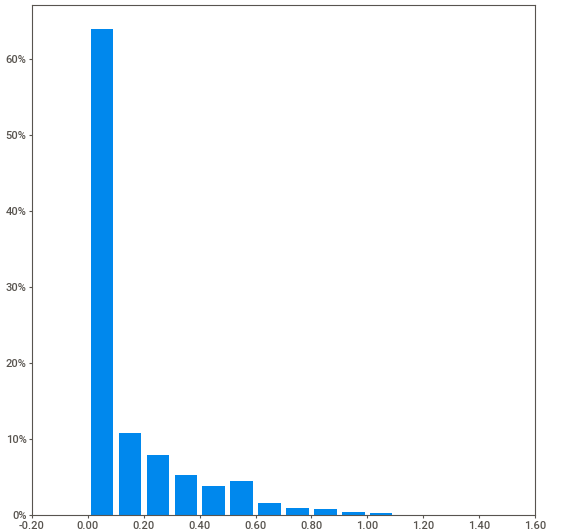
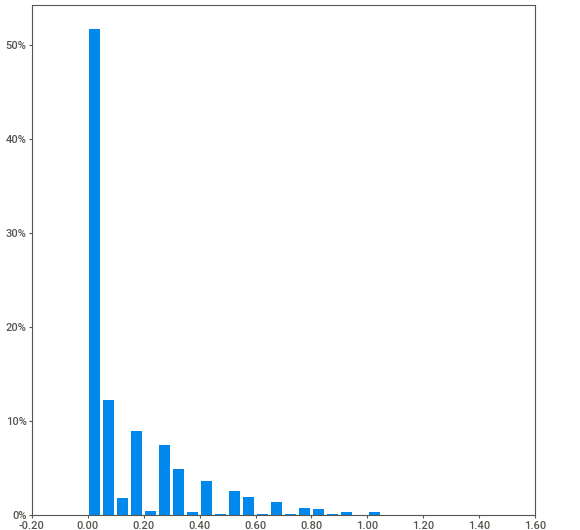
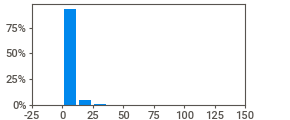
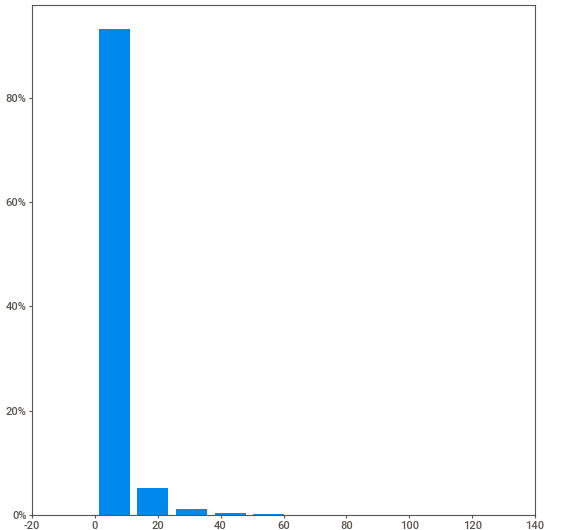
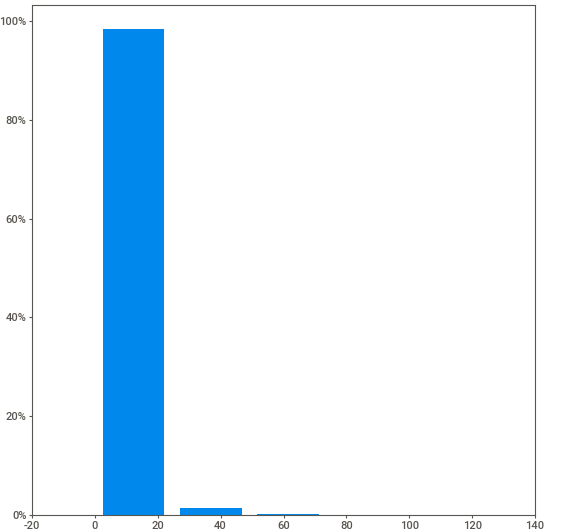
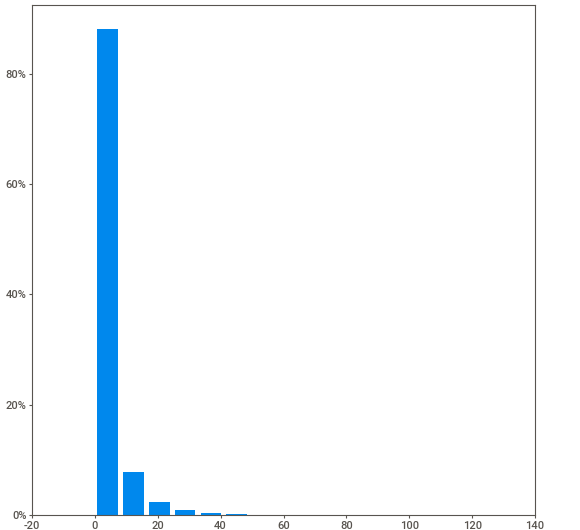
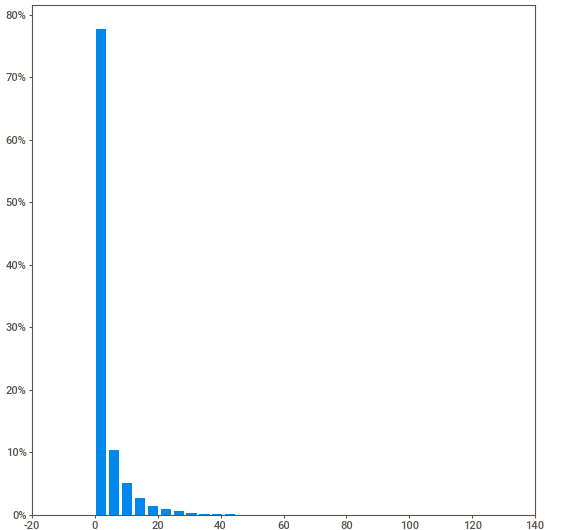
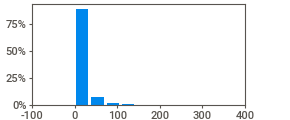
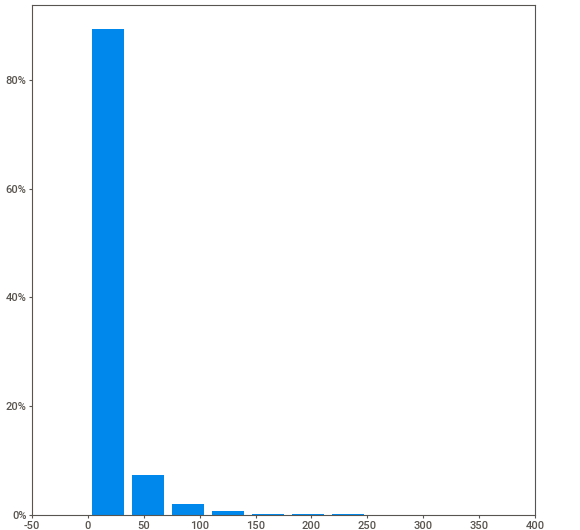
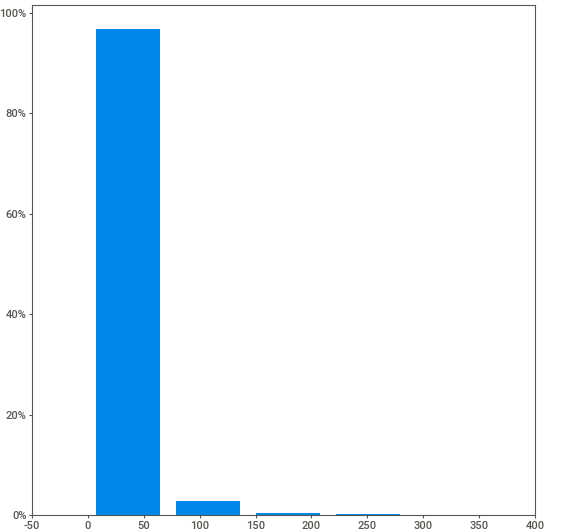
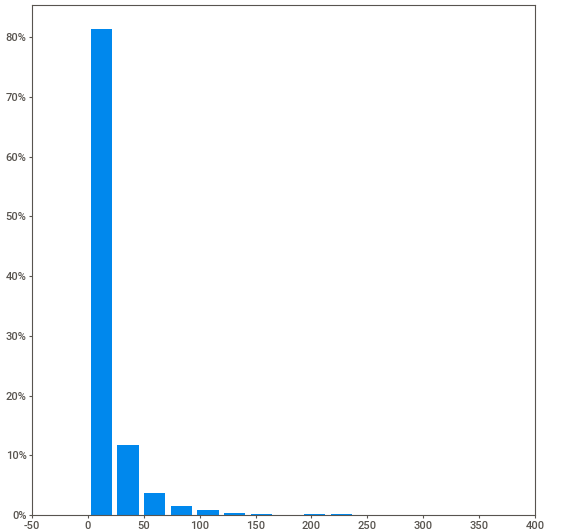
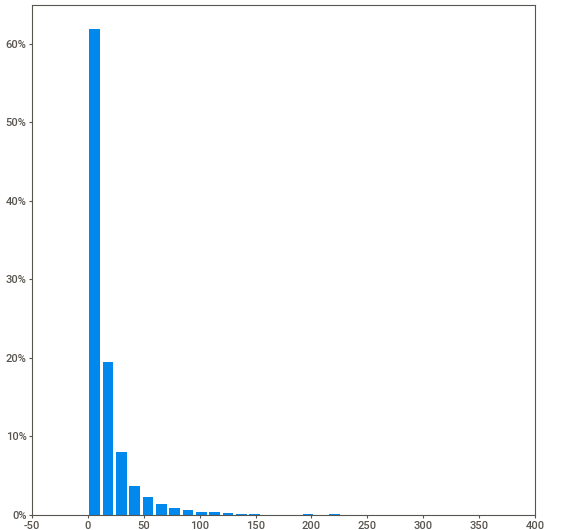
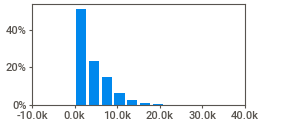
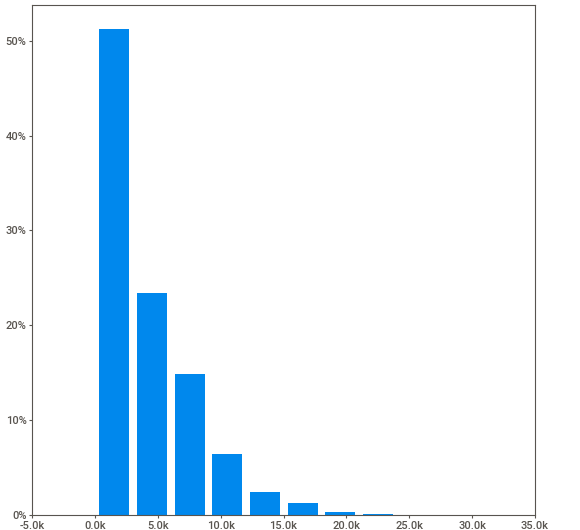
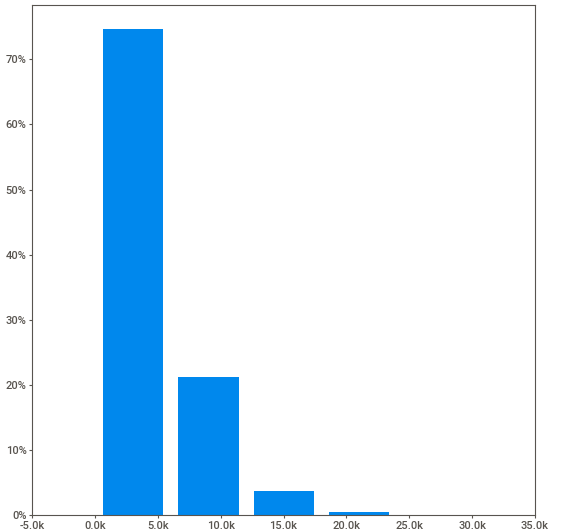
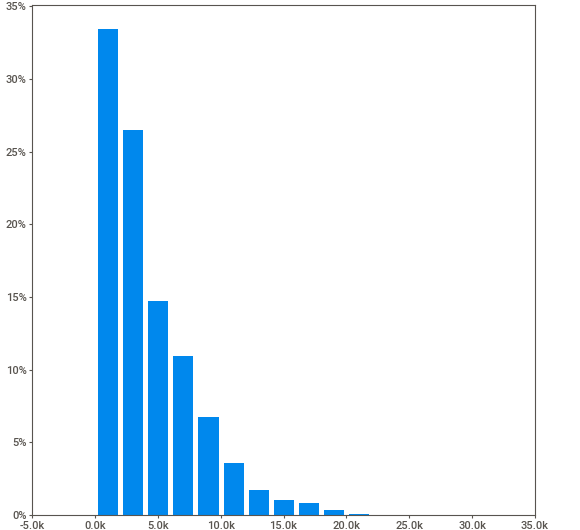
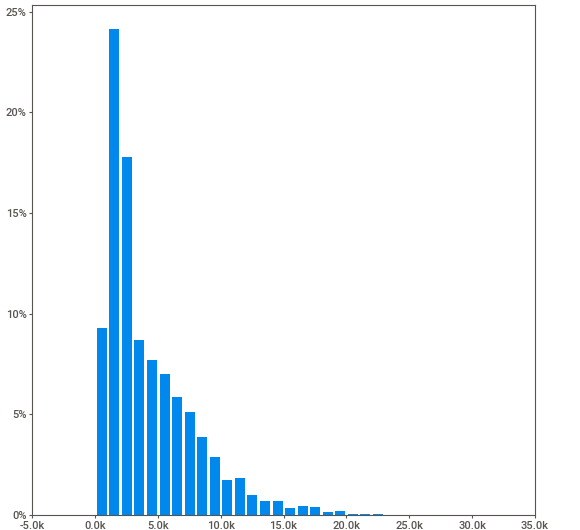
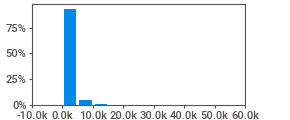
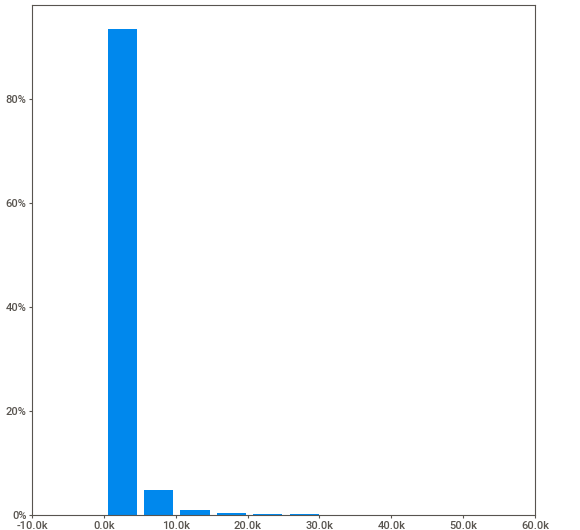
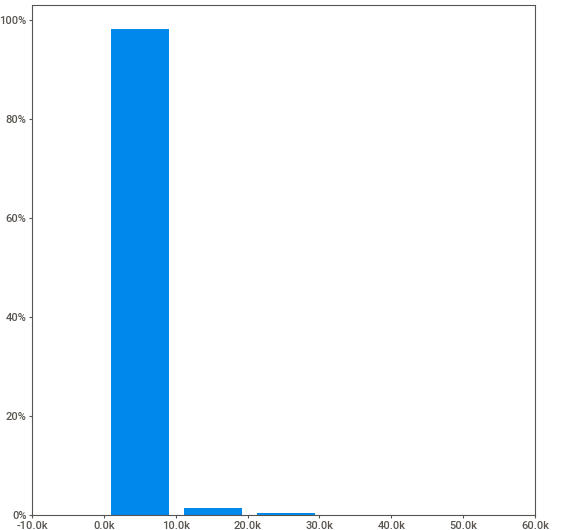
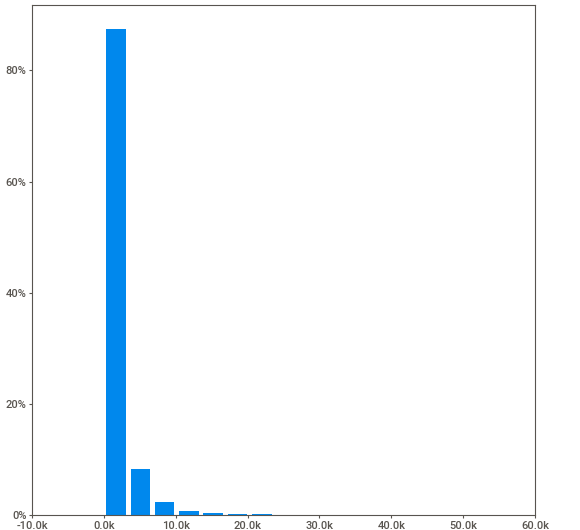
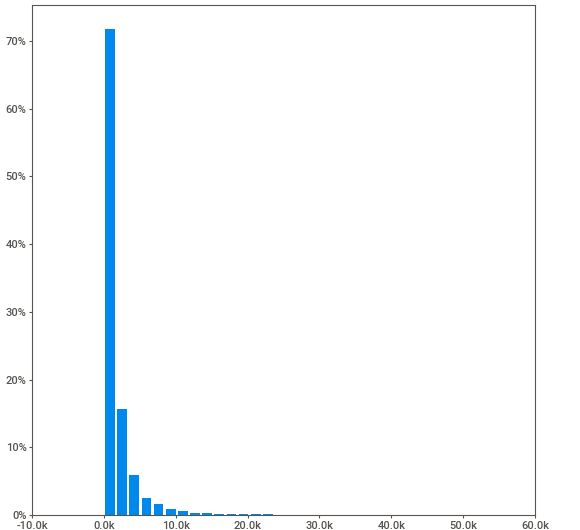
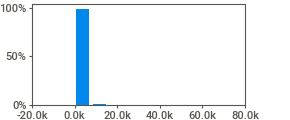
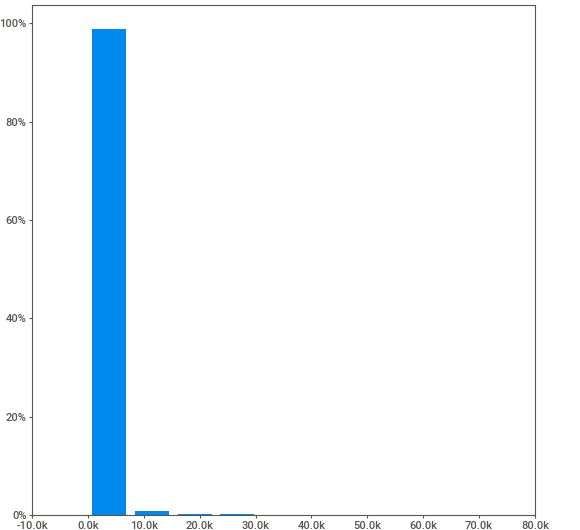
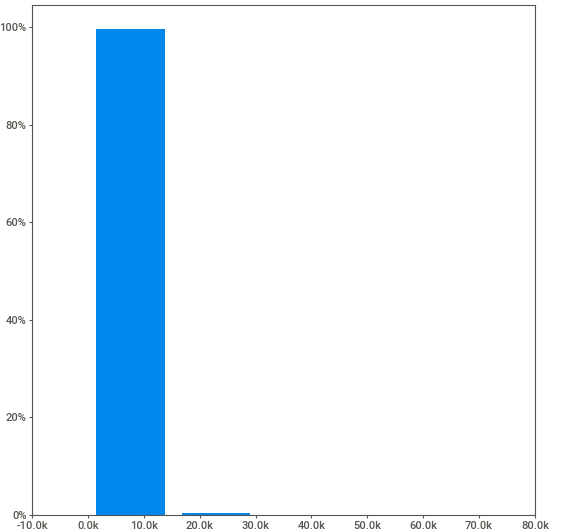
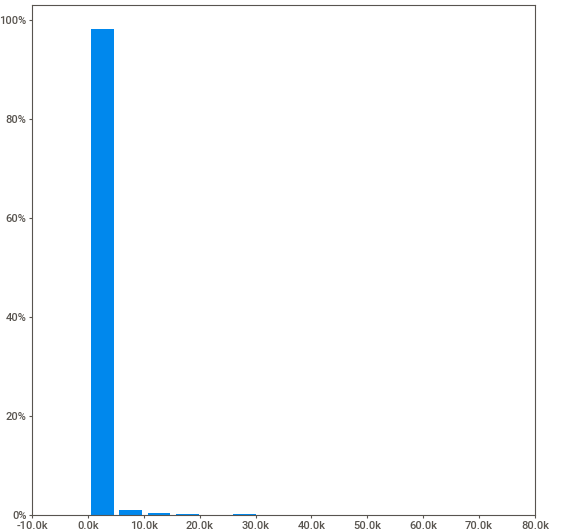
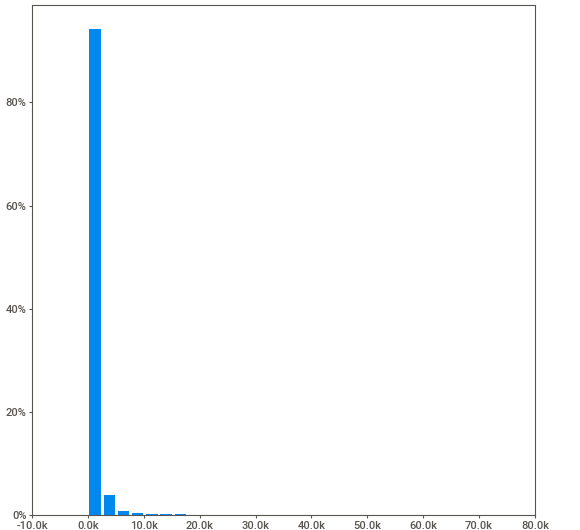
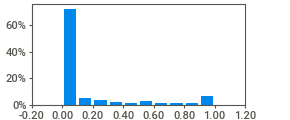
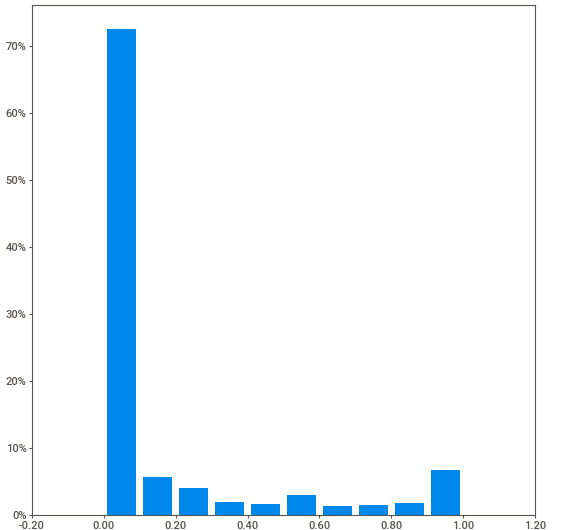
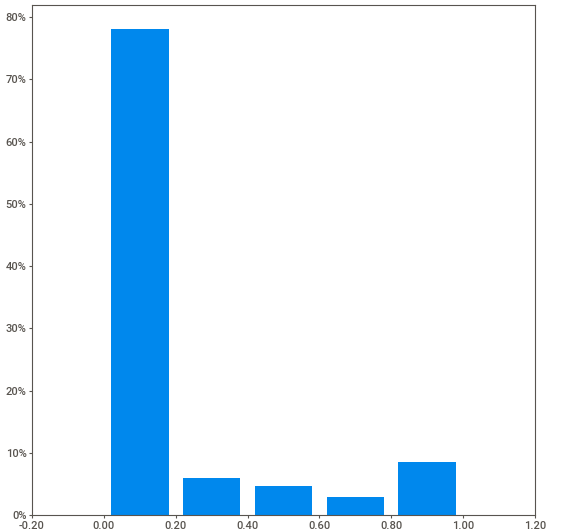
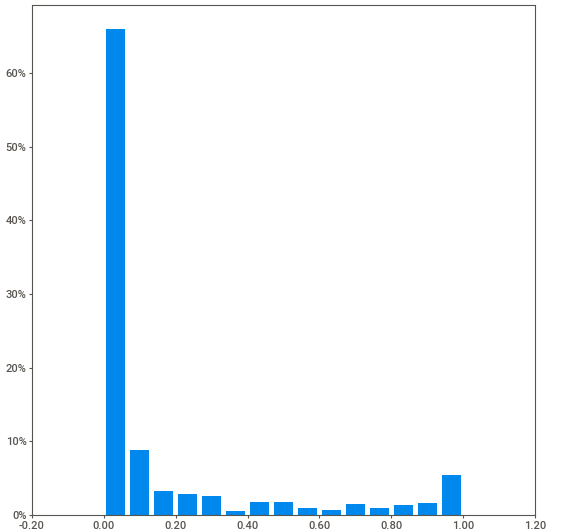
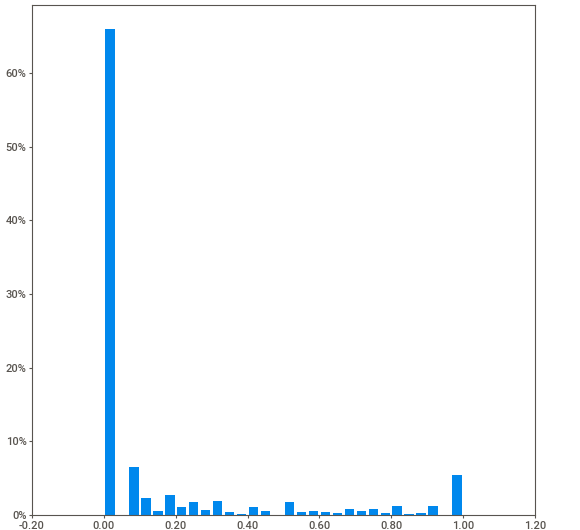
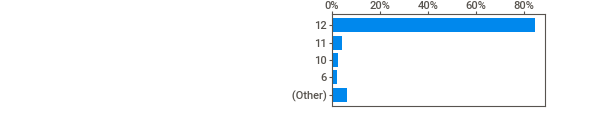
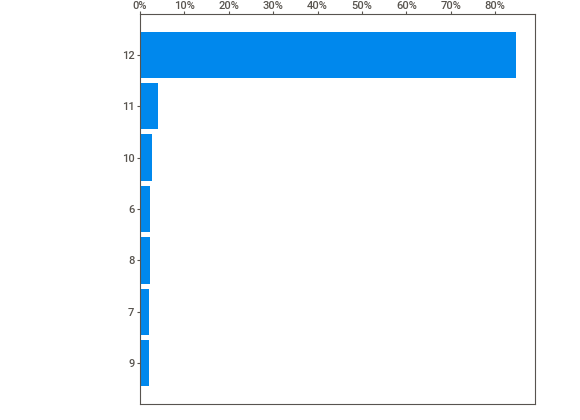
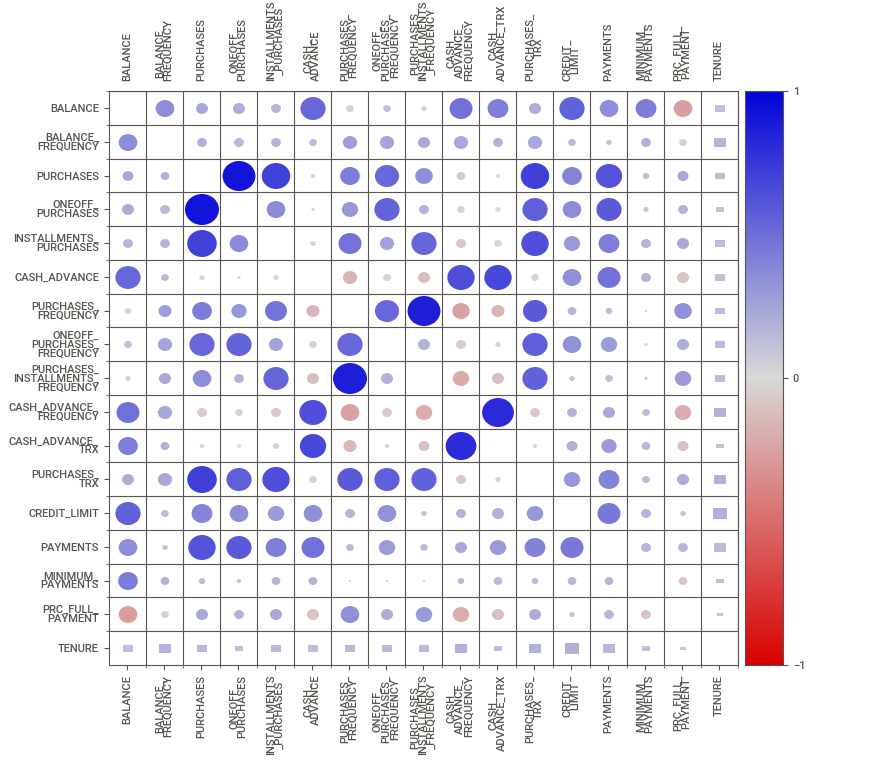
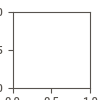

In [120]:
# Análise de distribuição e correlação dos dados através do Relatório do SweetVIZ
analise = sv.analyze(source = dados)
analise.show_notebook()

In [134]:
# Análise de correlação de dados
corr = dados.corr()
corr

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.347140   0.156563   
BALANCE_FREQUENCY                 0.347140           1.000000   0.176654   
PURCHASES                         0.156563           0.176654   1.000000   
ONEOFF_PURCHASES                  0.151504           0.141922   0.884825   
INSTALLMENTS_PURCHASES            0.078057           0.158832   0.706400   
CASH_ADVANCE                      0.555416           0.110448  -0.103550   
PURCHASES_FREQUENCY              -0.093023           0.235172   0.523609   
ONEOFF_PURCHASES_FREQUENCY        0.070347           0.203298   0.623759   
PURCHASES_INSTALLMENTS_FREQUENCY -0.078356           0.182171   0.415100   
CASH_ADVANCE_FREQUENCY            0.474100           0.195936  -0.158089   
CASH_ADVANCE_TRX                  0.461377           0.167171  -0.110315   
PURCHASES_TRX                     0.120449           0.222629   0.787760   
CREDIT_LIMIT                      0.524106           0.100891   0.364504   
PAYMENTS                          0.347554           0.102475   0.531434   
MINIMUM_PAYMENTS                  0.608070           0.235704   0.134368   
PRC_FULL_PAYMENT                 -0.340386          -0.102889   0.206029   
TENURE                            0.075548           0.127345   0.113054   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.151504                0.078057   
BALANCE_FREQUENCY                         0.141922                0.158832   
PURCHASES                                 0.884825                0.706400   
ONEOFF_PURCHASES                          1.000000                0.330825   
INSTALLMENTS_PURCHASES                    0.330825                1.000000   
CASH_ADVANCE                             -0.072372               -0.114993   
PURCHASES_FREQUENCY                       0.360382                0.573661   
ONEOFF_PURCHASES_FREQUENCY                0.702447                0.250662   
PURCHASES_INSTALLMENTS_FREQUENCY          0.162384                0.658921   
CASH_ADVANCE_FREQUENCY                   -0.107612               -0.172571   
CASH_ADVANCE_TRX                         -0.073585               -0.123733   
PURCHASES_TRX                             0.634882                0.695915   
CREDIT_LIMIT                              0.342239                0.233004   
PAYMENTS                                  0.479680                0.360356   
MINIMUM_PAYMENTS                          0.067367                0.145260   
PRC_FULL_PAYMENT                          0.144120                0.221261   
TENURE                                    0.083864                0.109249   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.555416            -0.093023   
BALANCE_FREQUENCY                     0.110448             0.235172   
PURCHASES                            -0.103550             0.523609   
ONEOFF_PURCHASES                     -0.072372             0.360382   
INSTALLMENTS_PURCHASES               -0.114993             0.573661   
CASH_ADVANCE                          1.000000            -0.262037   
PURCHASES_FREQUENCY                  -0.262037             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.110204             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.217940             0.862934   
CASH_ADVANCE_FREQUENCY                0.703208            -0.318488   
CASH_ADVANCE_TRX                      0.727805            -0.249291   
PURCHASES_TRX                        -0.127698             0.675041   
CREDIT_LIMIT                          0.314246             0.119415   
PAYMENTS                              0.410008             0.127345   
MINIMUM_PAYMENTS                      0.276632             0.003822   
PRC_FULL_PAYMENT                     -0.190271             0.305802   
TENURE                               -0.089770        

## Tratamento dos dados

In [121]:
# Removendo colunas que não contribuem para a análise
dados = dados.drop(columns='CUST_ID')

In [122]:
# Eliminando dados duplicados
dados = dados.drop_duplicates()

### Tratamento de nulos

#### CREDIT_LIMIT

In [123]:
dados['CREDIT_LIMIT'].isna().value_counts()

False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

In [124]:
dados['CREDIT_LIMIT'] = dados['CREDIT_LIMIT'].fillna(dados['CREDIT_LIMIT'].min())

In [125]:
dados['CREDIT_LIMIT'].isna().value_counts()

False    8950
Name: CREDIT_LIMIT, dtype: int64

#### MINIMUM_PAYMENTS

In [126]:
dados['MINIMUM_PAYMENTS'].isna().value_counts()

False    8637
True      313
Name: MINIMUM_PAYMENTS, dtype: int64

In [127]:
dados['MINIMUM_PAYMENTS'] = dados['MINIMUM_PAYMENTS'].fillna(dados['MINIMUM_PAYMENTS'].min())

In [128]:
dados['MINIMUM_PAYMENTS'].isna().value_counts()

False    8950
Name: MINIMUM_PAYMENTS, dtype: int64

### Eliminando outliers

In [131]:
for c in dados.columns:
    dados[c] = EliminarOutliers(dados[c])

## Análise

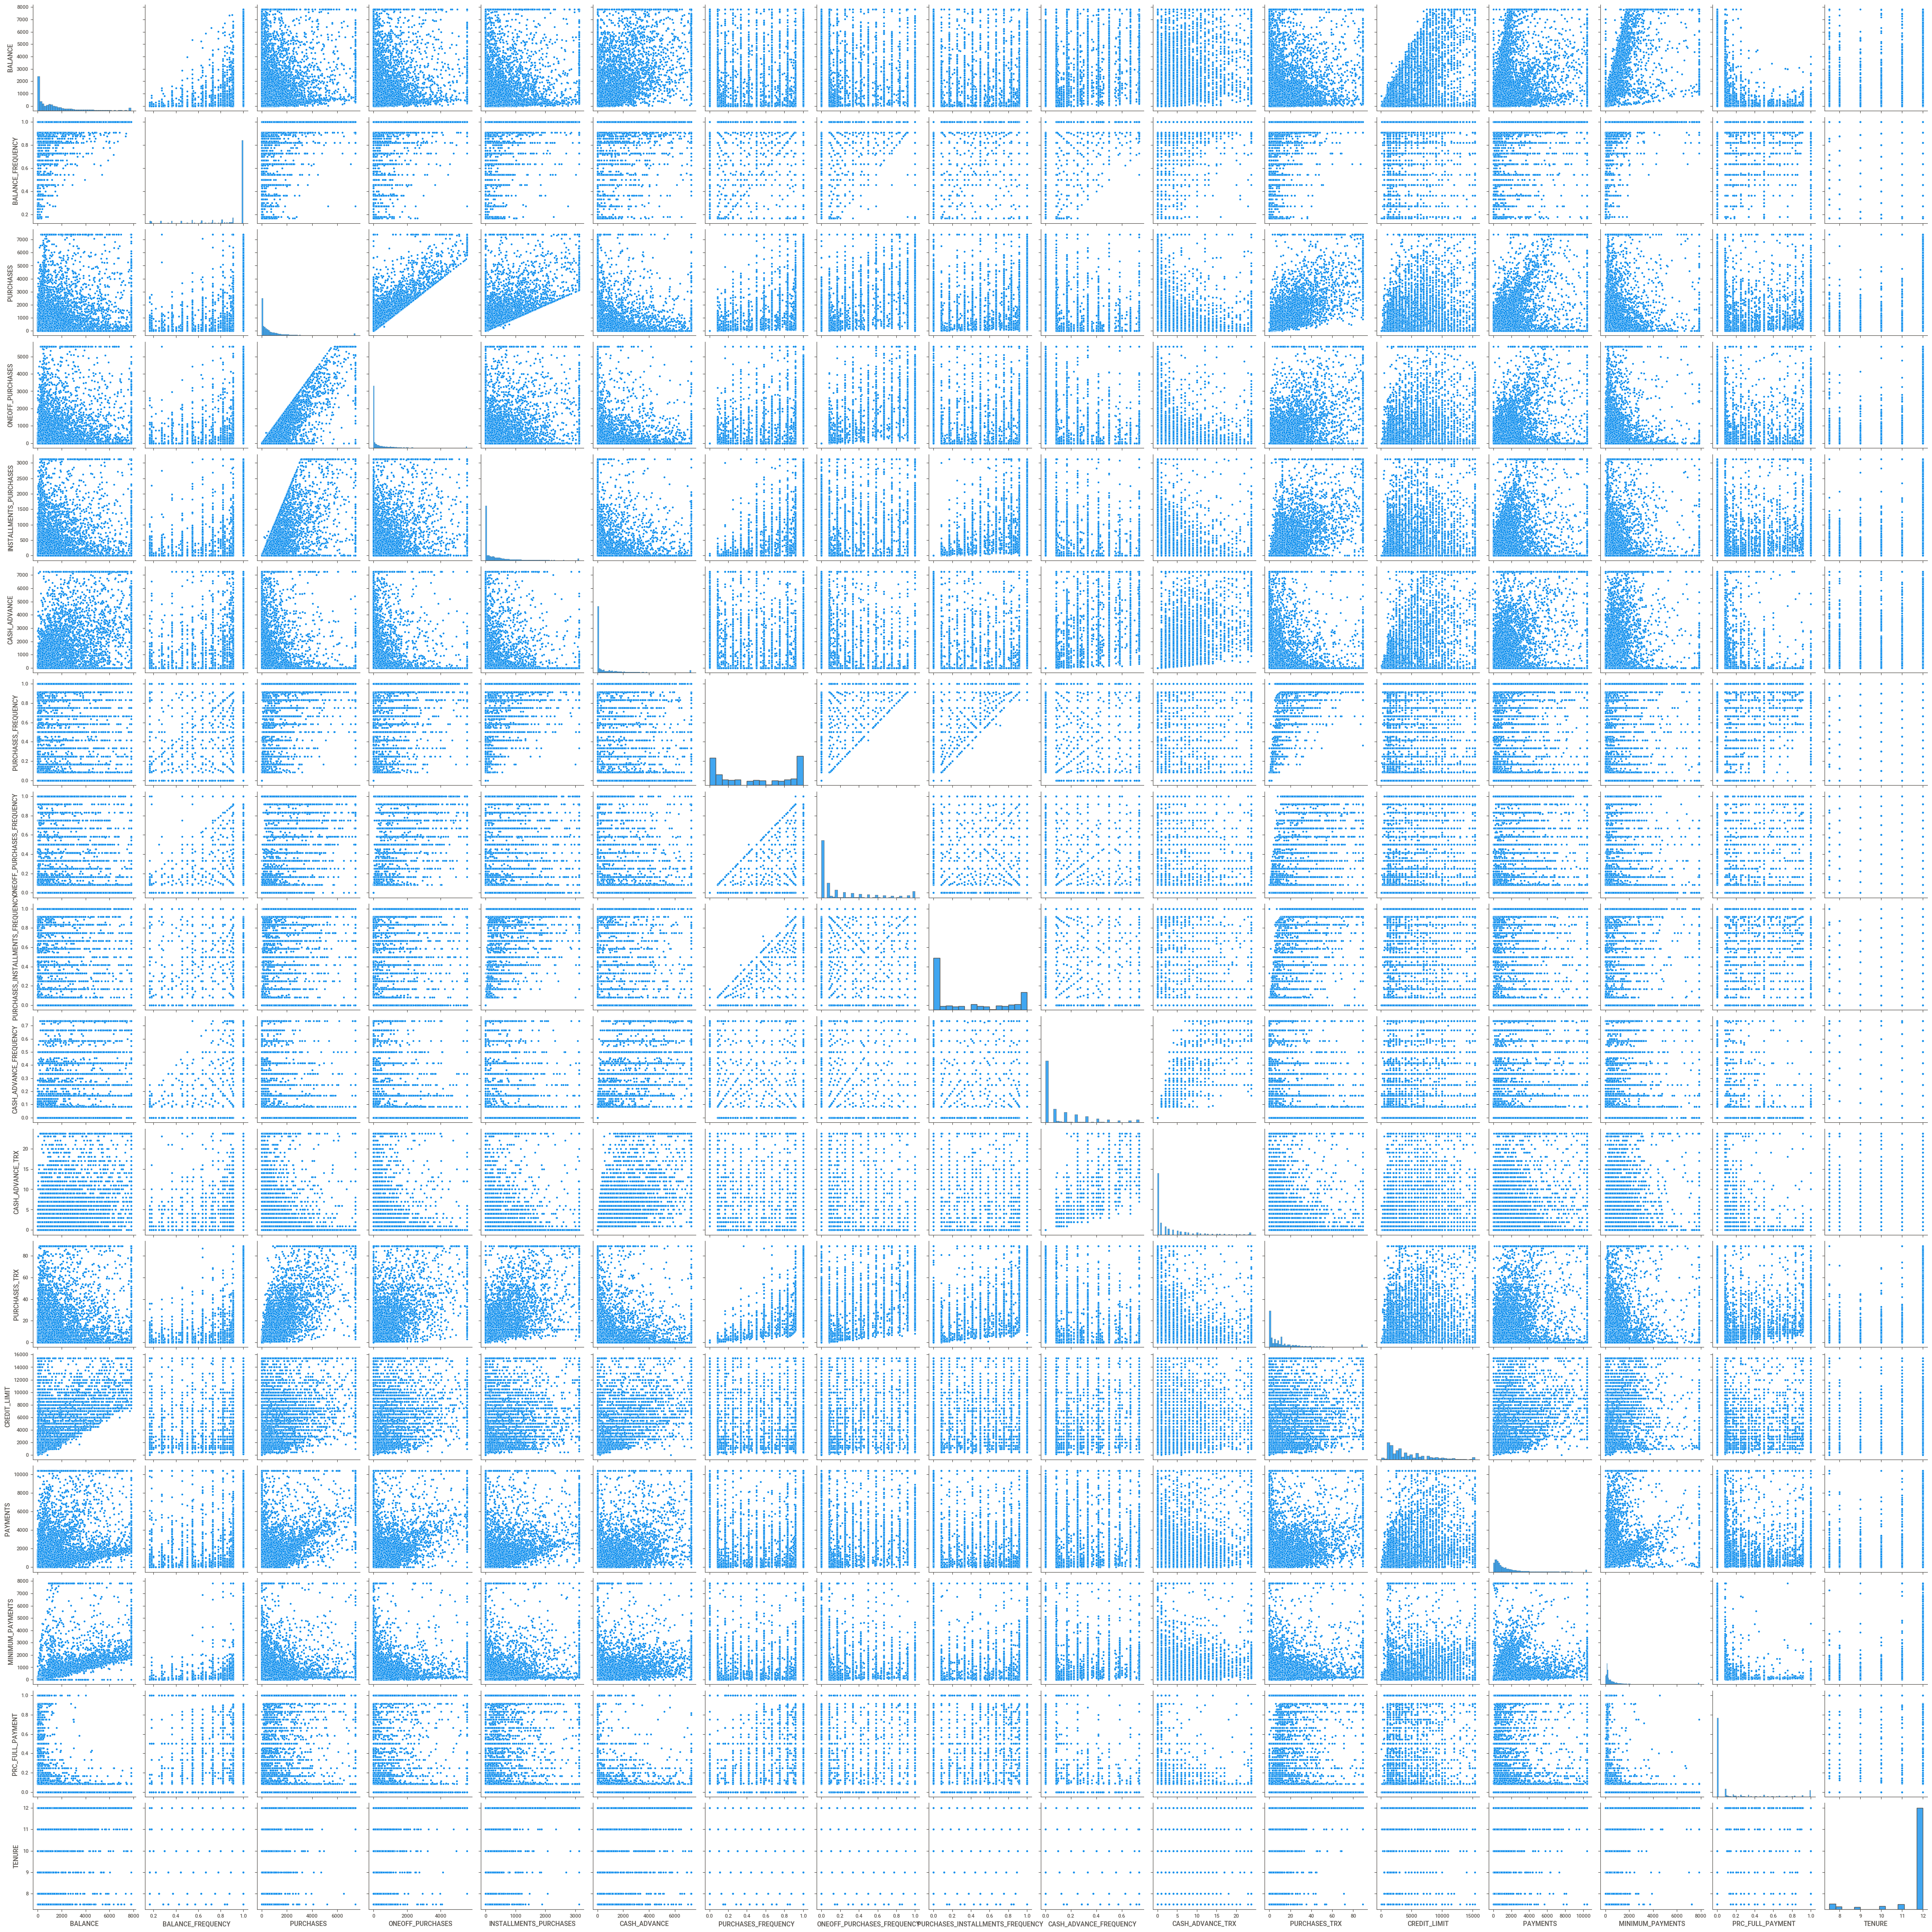

In [139]:
sns.pairplot(dados)